# Preprocessing

---
## Imports

In [1]:
import sys

import pandas as pd
from sklearn.model_selection import train_test_split

sys.path.append('../')

from utils.duplicates import remove_rows, get_duplicates_to_delete

In [2]:
df = pd.read_csv('../data/processed/csv/df.csv')
duplicates = pd.read_csv('../data/processed/csv/duplicates.csv')

--- 
## Remove duplicates

### Automatically delete:
- For each duplicate group, delete all but one rows marked as "Duplicate" for each "Style".
- Outputs "df_no_dup".

In [3]:
duplicates_to_delete = get_duplicates_to_delete(duplicates)
df_no_dup = remove_rows(df, duplicates_to_delete)
df_no_dup

Identifying rows to delete...


100%|██████████| 5684/5684 [00:05<00:00, 1057.56it/s]

Removing rows...


,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian
1,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
2,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
3,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian
4,beds/Asian/20802asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
...,...,...,...,...,...,...,...,...
84790,tables/Victorian/5victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
84791,tables/Victorian/6victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
84792,tables/Victorian/7victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
84793,tables/Victorian/8victorian-dining-tables.jpg,jpg,350,350,1.0,RGB,tables,Victorian


### Manually delete:
- Any rows marked as "Inspect" that belongs in the wrong "Class".
- Overwrite "df", as this DataFrame will continue to be used for further preprocessing.

In [4]:
inspects = duplicates[duplicates['Duplicate_Type'] == 'Inspect']
inspects

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
117,59,Inspect,tables/Craftsman/28467craftsman-dressers.jpg,jpg,350,350,1.0,RGB,tables,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
118,59,Inspect,beds/Craftsman/4866craftsman-bed.jpg,jpg,350,350,1.0,RGB,beds,Craftsman,fbea6ebbd105a451cd78b1ccae23cb8492f195ae1d2312...
289,145,Inspect,chairs/Contemporary/1181contemporary-indoor-ch...,jpg,350,350,1.0,RGB,chairs,Contemporary,eaef9014e0503bfd81510ba385fa3f419faae0429ea4c7...
290,145,Inspect,sofas/Contemporary/2852contemporary-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Contemporary,eaef9014e0503bfd81510ba385fa3f419faae0429ea4c7...
297,149,Inspect,sofas/Contemporary/409contemporary-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Contemporary,aabf7f10b544686ec442c1bb390b906f42fe6a7e913d90...
298,149,Inspect,chairs/Contemporary/1446contemporary-indoor-ch...,jpg,350,350,1.0,RGB,chairs,Contemporary,aabf7f10b544686ec442c1bb390b906f42fe6a7e913d90...
415,205,Inspect,chairs/Contemporary/870contemporary-indoor-cha...,jpg,350,350,1.0,RGB,chairs,Contemporary,eafeb034e0503af5815123e195eb27439faac54ade84c7...
416,205,Inspect,sofas/Contemporary/1293contemporary-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Contemporary,eafeb034e0503af5815123e195eb27439faac54ade84c7...
445,220,Inspect,chairs/Eclectic/5037eclectic-armchairs-and-acc...,jpg,350,350,1.0,RGB,chairs,Eclectic,ebfa3fb59050e02fc047c84a64adcdc8e48c92ff8f20c3...
446,220,Inspect,sofas/Transitional/4509transitional-sofas.jpg,jpg,350,350,1.0,RGB,sofas,Transitional,ebfa3fb59050e02fc047c84a64adcdc8e48c92ff8f20c3...


In [5]:
total_inspect_groups = inspects["Group"].nunique(dropna=False)

In [6]:
# inspects_rows_to_delete = [91, 154, 205, 227, 235, 277, 280, 281, 287, 290, 299, 310, 318, 323, 325] # Delete one of each pair
inspects_rows_to_delete = [91, 205]  # Only delete very different class ("tables" and "beds"). Similar classes are kept ("chairs" and "sofas")

In [7]:
inspect_review = inspects.copy()
inspect_review["Duplicate_Type"] = "Keep"
# inspect_review.loc[inspects_rows_to_delete, "Duplicate_Type"] = "DELETE"

In [8]:
# visualize_duplicates(inspect_review, total_inspect_groups)

In [9]:
inspects_to_delete = inspect_review[inspect_review["Duplicate_Type"] == "DELETE"]
inspects_to_delete

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash


In [10]:
df = remove_rows(df, inspects_to_delete)
df

Removing rows...


,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian
...,...,...,...,...,...,...,...,...
90078,tables/Victorian/5victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
90079,tables/Victorian/6victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
90080,tables/Victorian/7victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian
90081,tables/Victorian/8victorian-dining-tables.jpg,jpg,350,350,1.0,RGB,tables,Victorian


---
## Prepare DataFrame

In [11]:
import pandas as pd

# Assuming you have the original "df" and "duplicates_to_delete" DataFrames

# Merge the two DataFrames based on the "Path" column
merged_df = pd.merge(df, duplicates_to_delete[['Path']], on='Path', how='left', indicator=True)

# Create the "Duplicate_Type" column based on the merge indicator
merged_df['Duplicate_Type'] = merged_df['_merge'].map({'both': "Duplicate", 'left_only': "Unique"})

# Drop the merge indicator column
merged_df = merged_df.drop('_merge', axis=1)

# Update the original "df" with the new "Duplicate_Type" column
df = merged_df

In [12]:
df

,Path,Type,Width,Height,Ratio,Mode,Class,Style,Duplicate_Type
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian,Unique
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian,Unique
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian,Unique
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian,Unique
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian,Unique
...,...,...,...,...,...,...,...,...,...
90078,tables/Victorian/5victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian,Unique
90079,tables/Victorian/6victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian,Unique
90080,tables/Victorian/7victorian-side-tables-and-en...,jpg,350,350,1.0,RGB,tables,Victorian,Unique
90081,tables/Victorian/8victorian-dining-tables.jpg,jpg,350,350,1.0,RGB,tables,Victorian,Unique


---
## Split (train, validation, test)

### Prepare target and training

In [13]:
train_data = df.copy()

### Splitting

In [14]:
train_X, test_X = train_test_split(
    train_data,
    test_size=0.2,
    random_state=42
)
train_X, val_X = train_test_split(
    train_X,
    test_size=0.25,
    random_state=42
)

In [15]:
train_X

,Path,Type,Width,Height,Ratio,Mode,Class,Style,Duplicate_Type
86444,tables/Traditional/13761traditional-console-ta...,jpg,350,350,1.0,RGB,tables,Traditional,Unique
84487,tables/Modern/11214modern-outdoor-dining-table...,jpg,350,350,1.0,RGB,tables,Modern,Unique
54484,lamps/Modern/12205modern-table-lamps.jpg,jpg,350,350,1.0,RGB,lamps,Modern,Unique
89548,tables/Traditional/17423traditional-dining-tab...,jpg,350,350,1.0,RGB,tables,Traditional,Unique
19937,chairs/Traditional/10534traditional-armchairs-...,jpg,350,350,1.0,RGB,chairs,Traditional,Unique
...,...,...,...,...,...,...,...,...,...
39167,lamps/Beach/16197beach-style-table-lamps.jpg,jpg,350,350,1.0,RGB,lamps,Beach,Duplicate
26202,chairs/Transitional/24476transitional-armchair...,jpg,350,350,1.0,RGB,chairs,Transitional,Unique
42230,lamps/Contemporary/202contemporary-floor-lamps...,jpg,350,350,1.0,RGB,lamps,Contemporary,Unique
10575,chairs/Contemporary/4120contemporary-recliner-...,jpg,350,350,1.0,RGB,chairs,Contemporary,Unique


---
## Rescaling & Normalization
Note: Using Tensorflow for quick normalization and rescaling. In 'utils/tensorflow_preprocessing.py' file, there is a functions to normalize and rescale the each image in the dataset.

In [16]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [17]:
def process_image_from_path(image_path, img_height, img_width, to_augment):
    # Read image
    img = tf.io.read_file(image_path)

    # Decode to RGB
    img = tf.io.decode_jpeg(img, channels=3)

    # Resize
    img = tf.image.resize(img, [img_height, img_width])

    # Augment
    is_duplicate = tf.equal(to_augment, "Duplicate")

    def augment_image_tf(img):
        # Flip horizontally
        img = tf.image.random_flip_left_right(img)
        # Adjust brightness
        img = tf.image.random_brightness(img, max_delta=0.2)
        # Adjust contrast
        img = tf.image.random_contrast(img, lower=0.8, upper=1.2)

        return img

    img = tf.cond(is_duplicate, lambda: augment_image_tf(img), lambda: img)

    # Rescale
    rescaling_layer = tf.keras.layers.Rescaling(scale=1. / 255)
    # img = rescaling_layer(img) 
    # Commented out right now cause it makes all the output image black, which I'm not sure is supposed to happen

    return img

In [18]:
def prepare_image_dataset(df, img_height, img_width, batch_size, base_path='../data/raw/Furniture_Data',
                          label_encoder=None):
    
    prepared_df = df.assign(Path=df['Path'].apply(lambda path: base_path + "/" + path))
    
    # REMOVE (shorten the df for faster testing)
    prepared_df = prepared_df.sample(frac=0.05, random_state=42)  

    # Perform label encoding on the class labels
    if label_encoder is None: 
        label_encoder = LabelEncoder()
        prepared_df['Class_Encoded'] = label_encoder.fit_transform(prepared_df['Class'])
    else:
        prepared_df['Class_Encoded'] = label_encoder.transform(prepared_df['Class'])

    dataset = tf.data.Dataset.from_tensor_slices(
        (prepared_df['Path'].values,
         prepared_df["Duplicate_Type"].values,
         prepared_df['Class_Encoded'].values)
    )

    image_ds = dataset.map(lambda path, duplicate_type, class_label:
                           (
                               process_image_from_path(image_path=path,
                                                       img_height=img_height,
                                                       img_width=img_width,
                                                       to_augment=duplicate_type),
                               class_label
                           ),
                           num_parallel_calls=tf.data.AUTOTUNE
                           )

    image_ds = image_ds.batch(batch_size)

    return image_ds, label_encoder

In [19]:
train_dataset, label_encoder = prepare_image_dataset(train_X, img_height=256, img_width=256, batch_size=32)
val_dataset, _ = prepare_image_dataset(val_X, img_height=256, img_width=256, batch_size=32, label_encoder=label_encoder)
test_dataset, _ = prepare_image_dataset(test_X, img_height=256, img_width=256, batch_size=32,
                                     label_encoder=label_encoder)

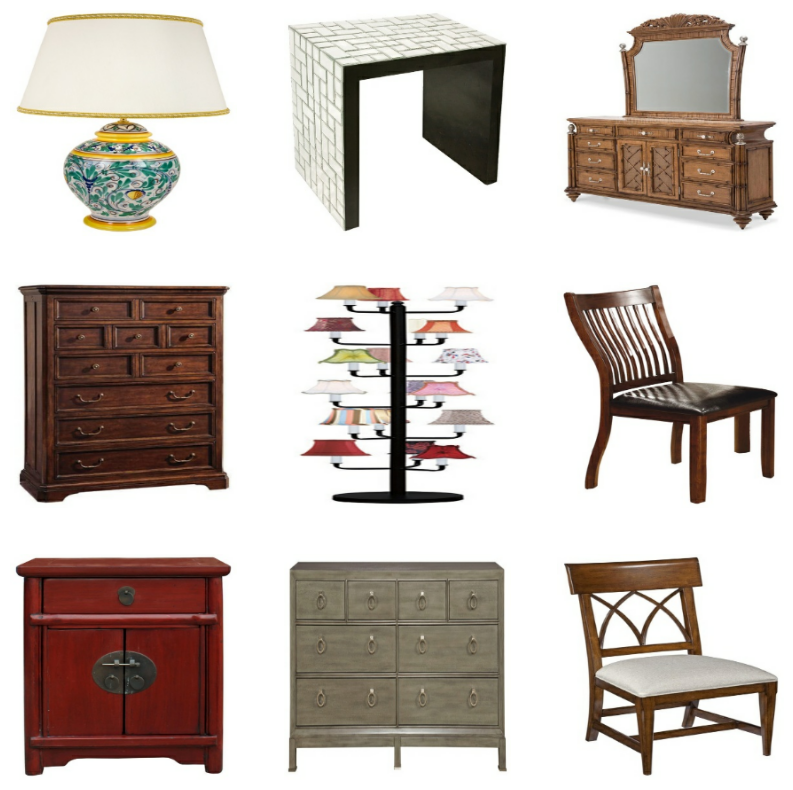

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        # plt.title(class_names[labels[i]])
        plt.axis("off")
        
# DON'T WORRY if the images here are black. Comment out the rescaling part in process_image_from_path() to see the images.

---
## Test

In [21]:
from tensorflow.keras import layers, models, Input
from tensorflow.keras.callbacks import ProgbarLogger

In [22]:
model = models.Sequential([
    Input(shape=(256, 256, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),
    # layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    # layers.Dense(64, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [23]:
# Step 3: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Step 4: Train the Model
epochs = 1
history = model.fit(
    train_dataset,
    epochs=epochs,
    callbacks=[ProgbarLogger()]
)

85/85 ━━━━━━━━━━━━━━━━━━━━ 25s 292ms/step - accuracy: 0.3473 - loss: 24119.5449


In [25]:
# Step 5: Evaluate the Model
test_loss, test_accuracy = model.evaluate(test_dataset, steps=len(test_dataset))
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.6161 - loss: 77.7142
Test Loss: 82.2816
Test Accuracy: 0.6238


In [26]:
print(train_dataset.element_spec)

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))


In [27]:
print(test_dataset.element_spec)

(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))
